In [19]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from traitlets.traitlets import List
def averageX(array : list) -> float:
  mx = 0
  for i in range(0,len(array)):
    mx+=array[i]
  return mx/len(array)

def dx (array : list): 
  dx = 0
  mx = averageX(array)
  for i in range(0,len(array)):
    dx+= array[i]* array[i] - mx*mx
  return dx/len(array)
def covXY(x: list,y:list) -> float:
  if(len(x)!= len(y)):
    return
  cov = 0
  mx = averageX(x)
  my = averageX(y)
  for i in range(0,len(x)):
    cov+= (x[i]*y[i] - mx*my)
  return cov/len(x)

def getRegressionVector(k,b, x : list):
  y = []
  for i in range(0,len(x)):
    y.append(b+ k*x[i])
  return y
def Qregression(b0,b1,y_data:list,x_data:list):
  y = 0
  for i in range(0,len(x_data)):
    y+=pow(y_data[i] - (b0 + b1*x_data[i]),2)
  return y
def QRemains(x_data : list,b0,b1,my):
  result = 0
  for i in range(0,len(x_data)):
    result+=pow((b0 +b1*x_data[i] - my),2)
  return result
def fisher_criterion(v1, v2):
  return abs(np.mean(v1) - np.mean(v2)) / (np.var(v1) + np.var(v2))
def show_grafics(f_value,statistic,x,y,y_regression):
  if(f_value>statistic):
    print("Похоже на линейную зависимость")
    plt.plot(x, y_regression)
    plt.show()  
    print("Исходный график:")
    plt.scatter(x, y)
    plt.show() 
  else:
    print("Вероятно не линейная зависимость, исходный график:")
    plt.scatter(x, y)
    plt.show() 
  return
def checkLinearRegression(x : list,y :list):
  if(len(x)!= len(y)):
    print("Не совпадают размерности векторов")
    return
  sort(x,y)
  b1 = covXY(x,y)/dx(x)
  mx = averageX(x)
  my = averageX(y)
  b0 = my - b1*mx
  y_regression = getRegressionVector(b1,b0,x)
  statistic = Qregression(b0,b1,y,x)/(QRemains(x,b0,b1,my)/(len(x) - 2))
  f_value = fisher_criterion(y, x)
  show_grafics(f_value,statistic,x,y,y_regression)
def parseFile(nameFile):
  f = open(nameFile)
  spliter = ' '
  arr = list(map(float, f.read().split(spliter)[4::8]))
  return arr
def sort(x:list,y:list):
  for i in range(0,len(x)-1):
    for j in range(0,len(x)-1):
      if(x[j]<x[j+1]):
        tmp = x[j+1]
        x[j+1] = x[j]
        x[j] = tmp
        tmp = y[j+1]
        y[j+1] = y[j]
        y[j] = tmp
  return



Зависимость веса от роста по OX - рост по OY - вес
Похоже на линейную зависимость


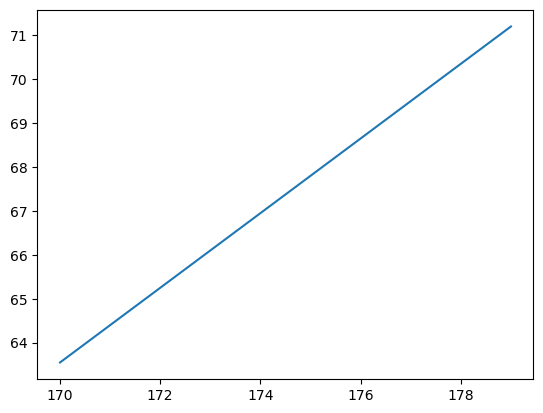

Исходный график:


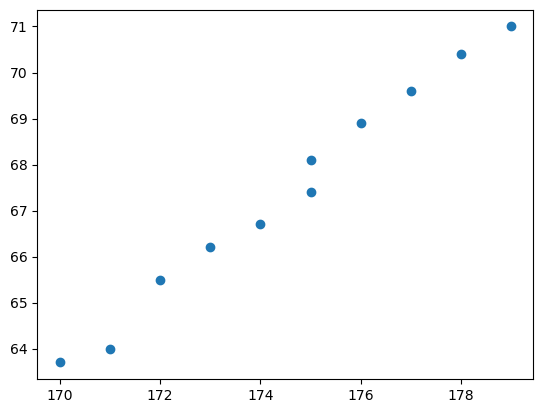

Зависимость акции ММК от доллара по OX - цена акции по OY - доллар
Вероятно не линейная зависимость, исходный график:


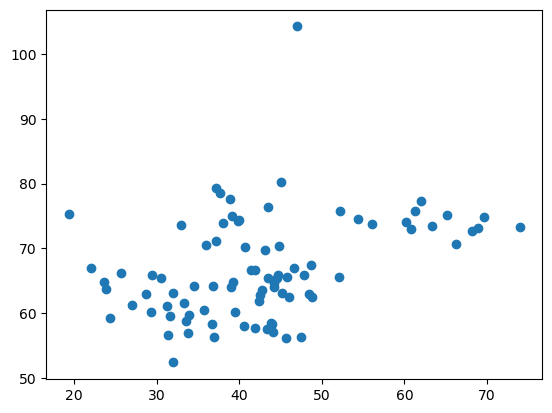

In [21]:
x : float= [170,171,172,173,174,175,175,176,177,178,179]
y = [63.7,64,65.5,66.2,66.7,67.4,68.1,68.9,69.6,70.4,71]

print("Зависимость веса от роста по OX - рост по OY - вес")
checkLinearRegression(x,y)
print("Зависимость акции ММК от доллара по OX - цена акции по OY - доллар")
x = parseFile("MAGN_160301_230301.txt")
y = parseFile("USDRUB_160301_230301.txt")
sort(x,y)
checkLinearRegression(x,y)


